In [1]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from proglearn.progressive_learner import ProgressiveLearner
from proglearn.deciders import SimpleAverage, KNNRegressionDecider
from proglearn.transformers import TreeRegressionTransformer
from proglearn.voters import TreeRegressionVoter

Using TensorFlow backend.
C:\Users\shizh\Anaconda3\envs\proglearn\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shizh\Anaconda3\envs\proglearn\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shizh\Anaconda3\envs\proglearn\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shizh\Anaconda3\envs\progl

In [2]:
# Function for generating Gaussian samples with a specific correlation and mean.
def makeOutput(x):
    # Return the L1 norm of the input array.
    return np.sum(np.abs(x), axis=1)

# Function for generating Gaussian samples with a specific correlation and mean.
def generateGaussians(sample_size, corr, means):
    # Assign the means and covariance.
    mean = means
    cov = [[1, corr], [corr, 1]]
    # Create the multvariate normals.
    x = np.random.multivariate_normal(mean, cov, sample_size)
    # Create the outputs with the inputs.
    z = makeOutput(x)
    return x,z

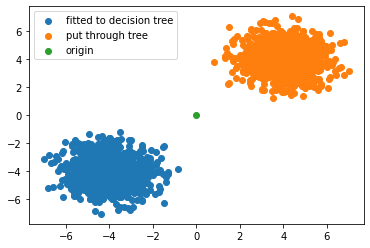

In [3]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

np.random.seed(0)

test_mean = (-4, -4)
samples = 1000
corr = 0
X1,Z1 = generateGaussians(samples, corr, test_mean)
X1_test,Z1_test = generateGaussians(samples, corr, test_mean)

transformer = DecisionTreeRegressor(max_depth=10).fit(X1, Z1)

X2 = X1*-1

plt.scatter(X1[:,0], X1[:,1])
plt.scatter(X2[:,0], X2[:,1])
plt.scatter(0,0)
plt.legend(['fitted to decision tree','put through tree', 'origin'])

In [4]:
leafs = transformer.apply(X2)
print(leafs)

[1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132
 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132
 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132
 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132
 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132
 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132
 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132
 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132
 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132
 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132
 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132
 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132
 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132
 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132 1132
 1132 

In [15]:
voter_good = TreeRegressionVoter()
voter_bad = TreeRegressionVoter()
voter_good.fit(transformer.apply(X1), Z1)
voter_bad.fit(transformer.apply(-X1), Z1)

TreeRegressionVoter()

In [16]:
ensemble_1 = np.zeros((X1_test.shape[0], 1, 2))
ensemble_2 = np.zeros((X1_test.shape[0], 1, 2))

good_voter_bad_vote = voter_good.predict(transformer.apply(-X1_test)).reshape(X1_test.shape[0])
good_voter_good_vote = voter_good.predict(transformer.apply(X1_test)).reshape(X1_test.shape[0])

ensemble_1[:,0,0] = good_voter_bad_vote
ensemble_1[:,0,1] = good_voter_good_vote

bad_voter_bad_vote = voter_bad.predict(transformer.apply(X1_test)).reshape(X1_test.shape[0])
bad_voter_good_vote = voter_bad.predict(transformer.apply(-X1_test)).reshape(X1_test.shape[0])

TypeError: fit() missing 2 required positional arguments: 'transformer_id_to_transformers' and 'transformer_id_to_voters'